In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import VotingClassifier


In [3]:
data=pd.read_csv('station_day.csv')

In [4]:
data.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [5]:
data.shape

(108035, 16)

In [6]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,86410.000000,65329.000000,90929.000000,91488.000000,92535.000000,59930.000000,95037.000000,82831.000000,82467.000000,76580.000000,69333.000000,22898.000000,87025.000000
mean,80.272571,157.968427,23.123424,35.240760,41.195055,28.732875,1.605749,12.257634,38.134836,3.358029,15.345394,2.423446,179.749290
std,76.526403,123.418672,34.491019,29.510827,45.145976,24.897797,4.369578,12.984723,39.128004,11.156234,29.348587,6.472409,131.324339
min,0.020000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,31.880000,70.150000,4.840000,15.090000,13.970000,11.900000,0.530000,5.040000,18.895000,0.160000,0.690000,0.000000,86.000000
50%,55.950000,122.090000,10.290000,27.210000,26.660000,23.590000,0.910000,8.950000,30.840000,1.210000,4.330000,0.400000,132.000000
75%,99.920000,208.670000,24.980000,46.930000,50.500000,38.137500,1.450000,14.920000,47.140000,3.610000,17.510000,2.110000,254.000000
max,1000.000000,1000.000000,470.000000,448.050000,467.630000,418.900000,175.810000,195.650000,963.000000,455.030000,454.850000,170.370000,2049.000000


In [7]:
data.isnull()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,False,False,False,False,True,True,True,True,False,False,False,False,False,True,False,False
108031,False,False,False,False,True,True,True,True,False,False,False,False,False,True,False,False
108032,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
108033,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [8]:
data.isnull().sum().sort_values(ascending=False)

Xylene        85137
NH3           48105
PM10          42706
Toluene       38702
Benzene       31455
O3            25568
SO2           25204
PM2.5         21625
AQI           21010
AQI_Bucket    21010
NO            17106
NO2           16547
NOx           15500
CO            12998
StationId         0
Date              0
dtype: int64

In [9]:
data.dtypes

StationId      object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [10]:
data.info

<bound method DataFrame.info of        StationId        Date  PM2.5    PM10     NO     NO2     NOx    NH3  \
0          AP001  2017-11-24  71.36  115.75   1.75   20.65   12.40  12.19   
1          AP001  2017-11-25  81.40  124.50   1.44   20.50   12.08  10.72   
2          AP001  2017-11-26  78.32  129.06   1.26   26.00   14.85  10.28   
3          AP001  2017-11-27  88.76  135.32   6.60   30.85   21.77  12.91   
4          AP001  2017-11-28  64.18  104.09   2.56   28.07   17.01  11.42   
...          ...         ...    ...     ...    ...     ...     ...    ...   
108030     WB013  2020-06-27   8.65   16.46    NaN     NaN     NaN    NaN   
108031     WB013  2020-06-28  11.80   18.47    NaN     NaN     NaN    NaN   
108032     WB013  2020-06-29  18.60   32.26  13.65  200.87  214.20  11.40   
108033     WB013  2020-06-30  16.07   39.30   7.56   29.13   36.69  29.26   
108034     WB013  2020-07-01  10.50   36.50   7.78   22.50   30.25  27.23   

          CO    SO2      O3  Benzene  Tolue

In [11]:
data.nunique()

StationId       110
Date           2009
PM2.5         22395
PM10          29575
NO            11963
NO2           12050
NOx           15608
NH3            9119
CO             2352
SO2            5801
O3            11166
Benzene        3017
Toluene        8713
Xylene         1892
AQI             930
AQI_Bucket        6
dtype: int64

In [12]:
data.columns

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [13]:
data['NO'].value_counts()

2.50      81
2.89      79
2.93      79
2.49      77
0.73      77
          ..
218.98     1
213.69     1
71.57      1
98.91      1
59.30      1
Name: NO, Length: 11963, dtype: int64

# DATA VISUALIZATION

In [ ]:
sns.pairplot(data=data)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 6))
br=data['NO'].value_counts().nlargest(50)
br.plot(kind='bar')
plt.xlabel('NO')
plt.ylabel('NO2')
plt.title('Counts of NO Using Bar Graph')
plt.show()


# plt.figure(figsize=(12, 6))
# hg=data['Price'].value_counts().nlargest(50)
# # data['Price'].plot(kind='hist', bins=10)
# hg.plot(kind='hist',edgecolor="black",bins=10)
# plt.xlabel('Price')
# plt.ylabel('Manufacturer')
# plt.title('Manufacturer Distribution Using Histogram')
# plt.show()

In [ ]:

plt.figure(figsize=(9, 15))
top_Manufacturer = data['NO'].value_counts().nlargest(50)
top_Manufacturer.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Manufacturer Distribution Using Pie Chart')
plt.show()

In [ ]:
plt.figure(figsize=(9, 6))
hg=data['NO2'].value_counts().nlargest(5)
# data['Price'].plot(kind='hist', bins=10)
hg.plot(kind='hist',edgecolor="black",bins=10)
plt.xlabel('NO2')
plt.ylabel('NOx')
plt.title('NOx Distribution Using Histogram')
plt.show()

In [ ]:
import seaborn as sb

sb.set(rc={'figure.figsize': (8, 6)})
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(8, 6))
sb.scatterplot(x='NH3', y='NO', data=data)
plt.title('NH3 vs. NO Using Scatter Plot')
plt.show()

In [39]:
data.head()


,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


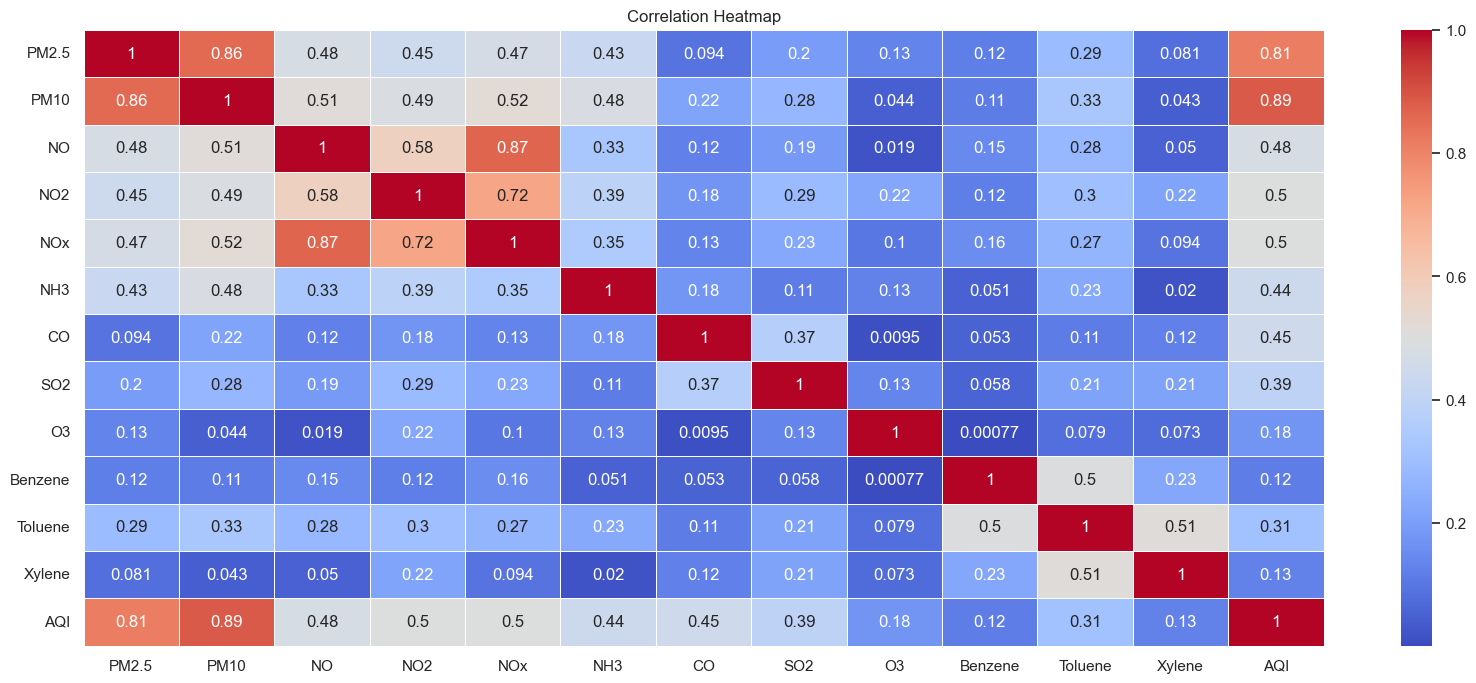

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the given data is stored in a Pandas DataFrame called "data"

# Select the numerical columns for the heatmap
numeric_cols = ['StationId','Date','PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene',
                'Xylene','AQI']
numeric_data = data[numeric_cols]

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [45]:
#Data Cleaning Process
# identify duplicate rows
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [StationId, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, AQI_Bucket]
Index: []


In [46]:
# count the number of duplicates
num_duplicates = data.duplicated().sum()
print(num_duplicates)

0


In [47]:
# check for duplicate value in specific column
duplicate_values = data.duplicated(subset=['Benzene', 'Toluene'])
print(duplicate_values)

0         False
1         False
2         False
3         False
4         False
          ...  
108030    False
108031    False
108032    False
108033    False
108034    False
Length: 108035, dtype: bool


# DATA CLEANING

In [48]:
# Select the numerical columns for outlier detection
numeric_cols = ['StationId','Date','PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene',
                'Xylene','AQI']
numeric_data = data[numeric_cols]

# Calculate z-scores for each column
z_scores = (numeric_data - numeric_data.mean()) / numeric_data.std()

# Define a threshold for identifying outliers (e.g., z-score > 3 or z-score < -3)
threshold = 3

# Find outliers in each column
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Count the number of outliers in each column
num_outliers = outliers.sum()

# Display the rows with outliers
outlier_rows = data[outliers.any(axis=1)]

# Print the number of outliers in each column
print("Number of outliers in each column:")
print(num_outliers)

# Print the rows with outliers
print("Rows with outliers:")
print(outlier_rows)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_8572\889455559.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = (numeric_data - numeric_data.mean()) / numeric_data.std()


Number of outliers in each column:
AQI           996
Benzene       528
CO           1448
Date            0
NH3           917
NO           2473
NO2          1469
NOx          2302
O3           1011
PM10         1175
PM2.5        1791
SO2          1333
StationId       0
Toluene      1579
Xylene        350
dtype: int64
Rows with outliers:
       StationId        Date   PM2.5    PM10      NO     NO2     NOx    NH3  \
182        AP001  2018-05-25   40.32   66.25    4.36   11.30    9.65  10.61   
185        AP001  2018-05-28   19.57   44.72    3.72    7.72    7.22  10.79   
186        AP001  2018-05-29   30.96   72.18    3.63   10.82    8.80  11.18   
191        AP001  2018-06-03   27.42   57.28    3.36   19.38   13.04   7.89   
192        AP001  2018-06-04   31.26   72.82    2.60   10.78    7.92   9.02   
...          ...         ...     ...     ...     ...     ...     ...    ...   
107896     WB013  2020-02-14  113.67  239.02  130.55  103.11  201.18  24.39   
107899     WB013  2020-02-17  

In [49]:
from scipy.stats import mstats

# Select the numerical columns for outlier transformation
numeric_cols = ['StationId','Date','PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene',
                'Xylene','AQI']
numeric_data = data[numeric_cols]

# Define the percentiles for winsorization (e.g., 5% from each tail)
lower_percentile = 0.05
upper_percentile = 0.95

# Apply winsorization to transform outliers
transformed_data = pd.DataFrame()
for col in numeric_cols:
    transformed_data[col] = mstats.winsorize(numeric_data[col], limits=[lower_percentile, upper_percentile])

# Replace the original numeric columns with the transformed values
data[numeric_cols] = transformed_data

# Display the transformed data
print(data)

C:\Users\KIIT\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\KIIT\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


       StationId        Date  PM2.5   PM10    NO   NO2   NOx   NH3   CO   SO2  \
0          BR009  2015-10-08   14.4  37.65  1.69  6.03  1.76  5.94  0.0  2.34   
1          BR009  2015-10-08   14.4  37.65  1.69  6.03  1.76  5.94  0.0  2.34   
2          BR009  2015-10-08   14.4  37.65  1.69  6.03  1.76  5.94  0.0  2.34   
3          BR009  2015-10-08   14.4  37.65  1.69  6.03  1.76  5.94  0.0  2.34   
4          BR009  2015-10-08   14.4  37.65  1.69  6.03  1.76  5.94  0.0  2.34   
...          ...         ...    ...    ...   ...   ...   ...   ...  ...   ...   
108030     BR009  2015-10-08   14.4  37.65  1.69  6.03  1.76  5.94  0.0  2.34   
108031     BR009  2015-10-08   14.4  37.65  1.69  6.03  1.76  5.94  0.0  2.34   
108032     BR009  2015-10-08   14.4  37.65  1.69  6.03  1.76  5.94  0.0  2.34   
108033     BR009  2015-10-08   14.4  37.65  1.69  6.03  1.76  5.94  0.0  2.34   
108034     BR009  2015-10-08   14.4  37.65  1.69  6.03  1.76  5.94  0.0  2.34   

          O3  Benzene  Tolu